# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [3]:

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [4]:
#A geração aleatória de números não é verdadeiramente "aleatória".
#É determinístico, e a sequência que gera é ditada pelo valor inicial que você passa random.seed.

np.random.seed(42)
    
#rvs: Random variates.
#norm.rvs(loc, scale, size)
#binom.rvs(n, p, size) ==> n: n° de experimentos; p: probabilidade de sucesso

dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

In [5]:
dataframe.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


## Inicie sua análise a partir da parte 1 a partir daqui

In [5]:
# Sua análise da parte 1 começa aqui.

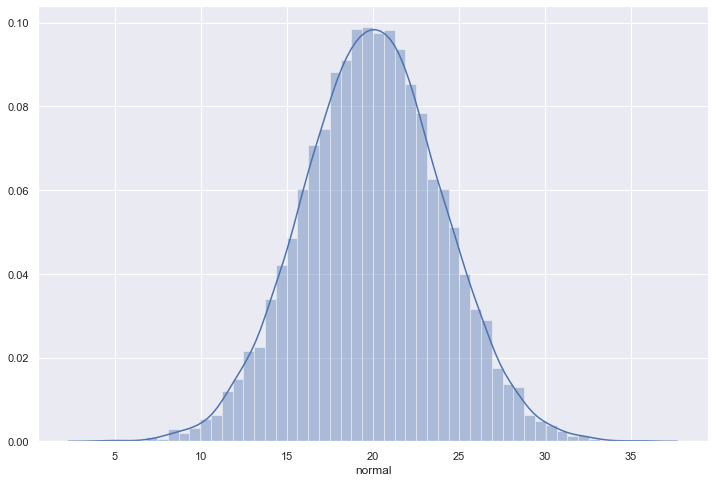

In [6]:
sns.distplot(dataframe['normal'])

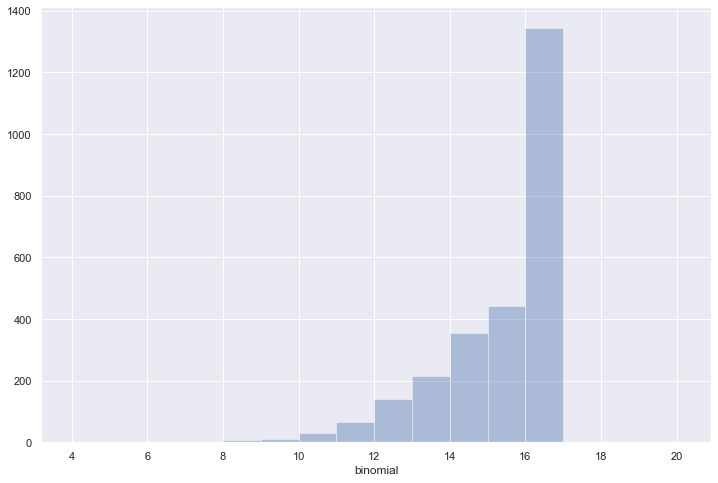

In [7]:
sns.distplot(dataframe['binomial'],bins=range(4, 18), kde=False)

In [12]:
normal_media = dataframe['normal'].mean()
normal_var = dataframe['normal'].var()
normal_desv = np.sqrt(normal_var)
print('Normal:')
print('\nmédia: ',normal_media,'\nvariância: ', normal_var,'\ndesvio padrão: ', normal_desv)

Normal:

média:  19.991456066526293 
variância:  16.110987985368915 
desvio padrão:  4.013849522013614


In [13]:
bin_media = dataframe['binomial'].mean()
bin_var = dataframe['binomial'].var()
bin_desv = np.sqrt(bin_var)
print('Binomial:')
print('\nmédia: ',bin_media,'\nvariância: ', bin_var,'\ndesvio padrão: ', bin_desv)

Binomial:

média:  20.097 
variância:  16.331224122412237 
desvio padrão:  4.0411909287253724


## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [55]:
#Quantis da variável normal

q1_norm = dataframe.normal.quantile(0.25)
q2_norm = dataframe.normal.quantile(0.5) 
q3_norm = dataframe.normal.quantile(0.75)

dataframe.normal.quantile([0.25,0.5,0.75])

0.25    17.309638
0.50    19.989620
0.75    22.684324
Name: normal, dtype: float64

In [56]:
#Quantis da variável binomial

q1_binom = dataframe.binomial.quantile(0.25)
q2_binom = dataframe.binomial.quantile(0.5) 
q3_binom = dataframe.binomial.quantile(0.75)

dataframe.binomial.quantile([0.25,0.5,0.75])

0.25    17.0
0.50    20.0
0.75    23.0
Name: binomial, dtype: float64

In [57]:
def q1():
    resposta = ((q1_norm - q1_binom).round(3), (q2_norm - q2_binom).round(3), (q3_norm - q3_binom).round(3))
    return resposta

In [58]:
q1()

(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [41]:
def q2():
    normal_media = dataframe['normal'].mean()
    normal_var = dataframe['normal'].var()
    normal_desv = np.sqrt(normal_var)
    
    ecdf = ECDF(dataframe.normal) #Retorna o CDF empírico de uma matriz 
    
    mais = ecdf((normal_media + normal_desv))
    menos = ecdf((normal_media - normal_desv))
    resultado = float((mais - menos).round(3))
    
    return resultado

In [42]:
q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [13]:
def q3():
    m_norm = dataframe['normal'].mean()
    v_norm = dataframe['normal'].var()
    m_binom = dataframe['binomial'].mean()
    v_binom = dataframe['binomial'].var()
    
    return ((m_binom - m_norm).round(3), (v_binom - v_norm).round(3))

In [14]:
q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [15]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [16]:
# Sua análise da parte 2 começa aqui.


In [17]:
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [67]:
def q4():
    mean_profile_filter = stars[stars['target'] == False]['mean_profile']
    media = mean_profile_filter.mean()
    desvio_padrao = mean_profile_filter.std()
    z = (mean_profile_filter - media) / desvio_padrao
    false_pulsar_mean_profile_standardized = z
    
    quantil_80 = sct.norm.ppf(0.80, loc = 0, scale = 1)
    quantil_90 = sct.norm.ppf(0.90, loc = 0, scale = 1)
    quantil_95 = sct.norm.ppf(0.95, loc = 0, scale = 1)
    
    ecdf = ECDF(false_pulsar_mean_profile_standardized) #Retorna o CDF empírico de uma matriz como uma função de etapa
    
    prob_quantil_80 = ecdf(quantil_80).round(3)
    prob_quantil_90 = ecdf(quantil_90).round(3)
    prob_quantil_95 = ecdf(quantil_95).round(3)
    
    return (prob_quantil_80, prob_quantil_90, prob_quantil_95)

In [68]:
q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [20]:
def q5():
    mean_profile_filter = stars[stars['target'] == 0]['mean_profile']
    media = mean_profile_filter.mean()
    desvio_padrao = mean_profile_filter.std()
    z = (mean_profile_filter - media) / desvio_padrao
    false_pulsar_mean_profile_standardized = z
    
    Q1_false_pulsar_mean_profile_standardized = np.percentile(false_pulsar_mean_profile_standardized, 25)
    Q2_false_pulsar_mean_profile_standardized = np.percentile(false_pulsar_mean_profile_standardized, 50)
    Q3_false_pulsar_mean_profile_standardized = np.percentile(false_pulsar_mean_profile_standardized, 75)

    Q1_normal = sct.norm.ppf(0.25, loc=0, scale=1)
    Q2_normal = sct.norm.ppf(0.50, loc=0, scale=1)
    Q3_normal = sct.norm.ppf(0.75, loc=0, scale=1)
    
    resposta = ((Q1_false_pulsar_mean_profile_standardized-Q1_normal).round(3), 
                (Q2_false_pulsar_mean_profile_standardized-Q2_normal).round(3),
                (Q3_false_pulsar_mean_profile_standardized-Q3_normal).round(3))    
   
    return resposta

In [21]:
q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.